In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
acc = pd.read_csv('/kaggle/input/crm-sales-opportunities/accounts.csv')
dd = pd.read_csv('/kaggle/input/crm-sales-opportunities/data_dictionary.csv')
prod = pd.read_csv('/kaggle/input/crm-sales-opportunities/products.csv')
sp = pd.read_csv('/kaggle/input/crm-sales-opportunities/sales_pipeline.csv')
st = pd.read_csv('/kaggle/input/crm-sales-opportunities/sales_teams.csv')

In [3]:
print("Accounts Dataset:")
print(acc.info())
print(acc.head())

print("\nData Dictionary Dataset:")
print(dd.info())
print(dd.head())

print("\nProducts Dataset:")
print(prod.info())
print(prod.head())

print("\nSales Pipeline Dataset:")
print(sp.info())
print(sp.head())

print("\nSales Teams Dataset:")
print(st.info())
print(st.head())

Accounts Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
None
            account     sector  year_established  revenue  employees  \
0  Acme Corporation  technolgy              1996  1100.04       2822   
1        Betasoloin    medical              1999   251.41        495   
2          Betatech    medical              1986   647.18       1185   
3        Bioholding    medical              2012   587.34       1356   
4           Bioplex    medical

In [4]:
acc_null_sum = acc.isnull().sum()
dd_null_sum = dd.isnull().sum()
prod_null_sum = prod.isnull().sum()
sp_null_sum = sp.isnull().sum()
st_null_sum = st.isnull().sum()

print("Null Sums for Accounts Dataset:")
print(acc_null_sum)

print("\nNull Sums for Data Dictionary Dataset:")
print(dd_null_sum)

print("\nNull Sums for Products Dataset:")
print(prod_null_sum)

print("\nNull Sums for Sales Pipeline Dataset:")
print(sp_null_sum)

print("\nNull Sums for Sales Teams Dataset:")
print(st_null_sum)

Null Sums for Accounts Dataset:
account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

Null Sums for Data Dictionary Dataset:
Table          0
Field          0
Description    0
dtype: int64

Null Sums for Products Dataset:
product        0
series         0
sales_price    0
dtype: int64

Null Sums for Sales Pipeline Dataset:
opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

Null Sums for Sales Teams Dataset:
sales_agent        0
manager            0
regional_office    0
dtype: int64


In [5]:
acc['subsidiary_of'] = acc['subsidiary_of'].fillna('Unknown')

sp['account'] = sp['account'].fillna('Unknown')
sp['engage_date'] = sp['engage_date'].fillna('Unknown')
sp['close_date'] = sp['close_date'].fillna('Unknown')
sp['close_value'] = sp['close_value'].fillna(0)

acc_null_sum = acc.isnull().sum()
sp_null_sum = sp.isnull().sum()

# Print null sums
print("Null Sums for Accounts Dataset:")
print(acc_null_sum)

print("\nNull Sums for Sales Pipeline Dataset:")
print(sp_null_sum)

Null Sums for Accounts Dataset:
account             0
sector              0
year_established    0
revenue             0
employees           0
office_location     0
subsidiary_of       0
dtype: int64

Null Sums for Sales Pipeline Dataset:
opportunity_id    0
sales_agent       0
product           0
account           0
deal_stage        0
engage_date       0
close_date        0
close_value       0
dtype: int64


In [6]:
acc = acc.drop_duplicates()
dd = dd.drop_duplicates()
prod = prod.drop_duplicates()
sp = sp.drop_duplicates()
st = st.drop_duplicates()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


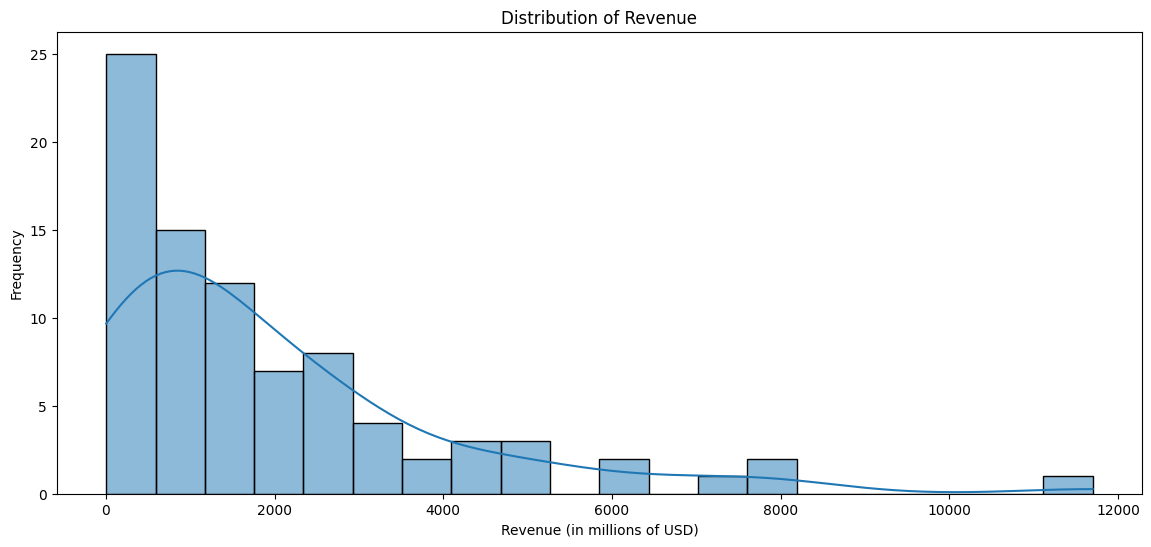

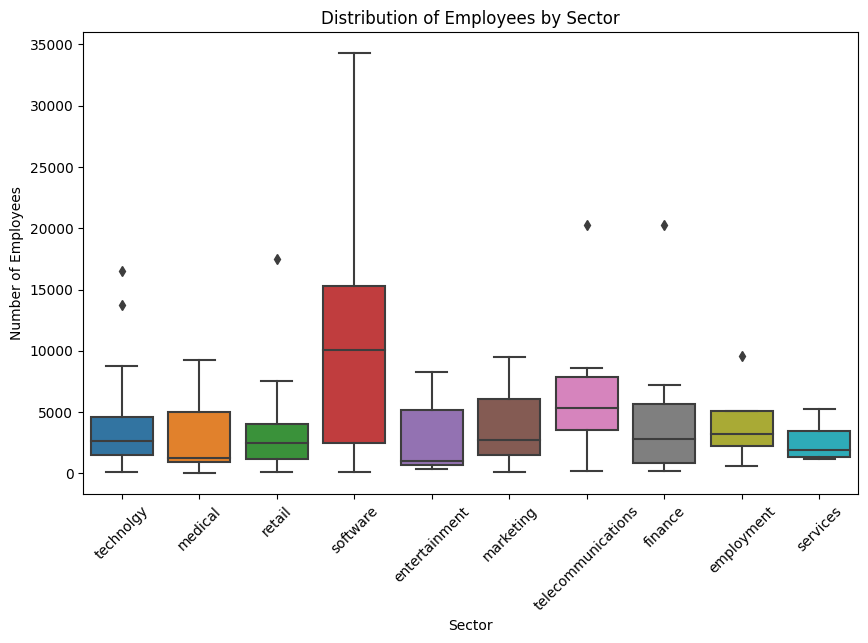

In [7]:
plt.figure(figsize=(14, 6))
sns.histplot(acc['revenue'], bins=20, kde=True)
plt.title('Distribution of Revenue')
plt.xlabel('Revenue (in millions of USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='sector', y='employees', data=acc)
plt.title('Distribution of Employees by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


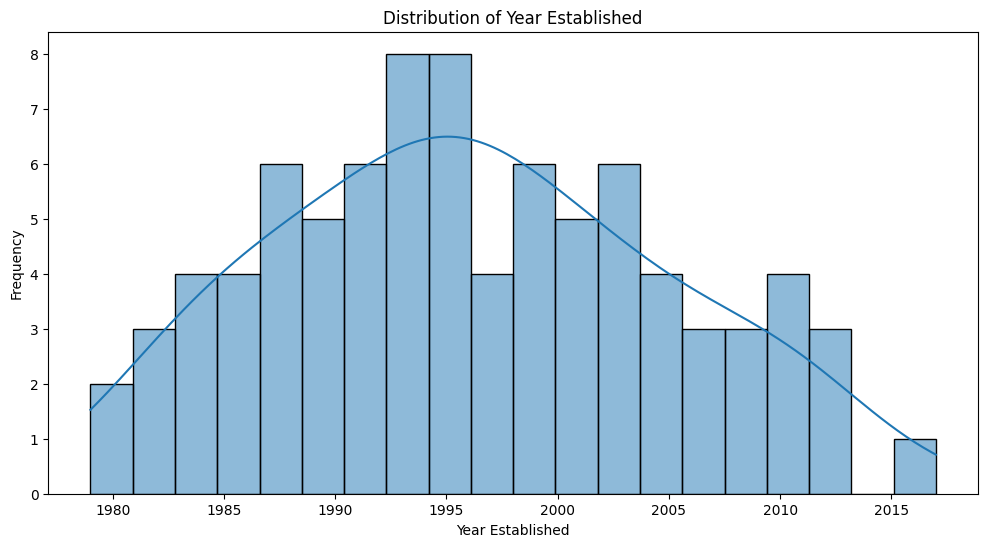

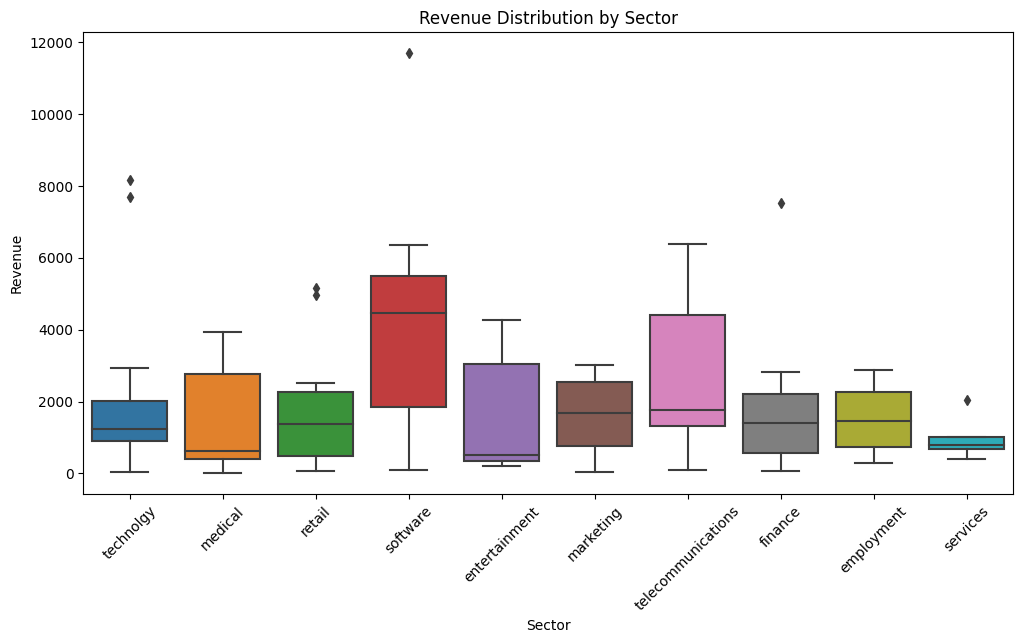

In [8]:
plt.figure(figsize=(12, 6))
sns.histplot(x='year_established', data=acc, bins=20, kde=True)
plt.title('Distribution of Year Established')
plt.xlabel('Year Established')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='revenue', data=acc)
plt.title('Revenue Distribution by Sector')
plt.xlabel('Sector')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

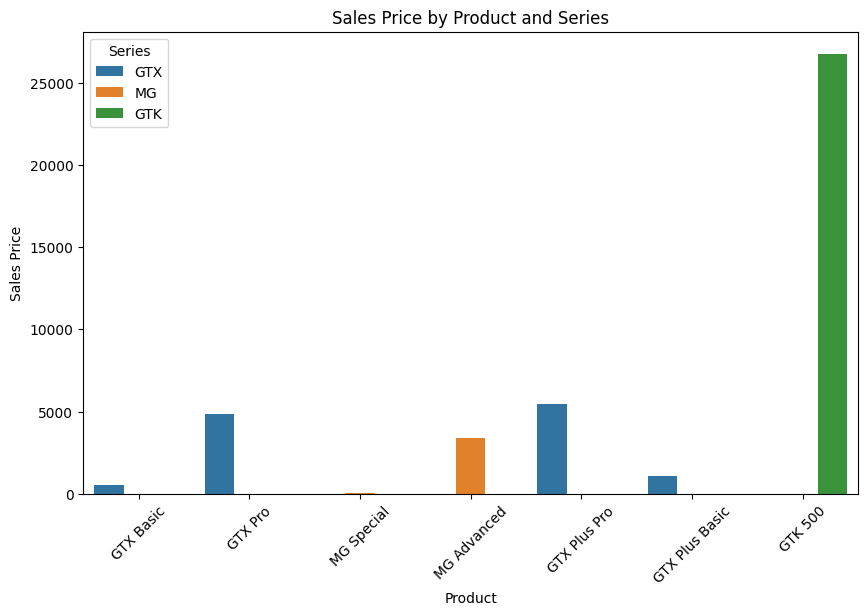

In [9]:
# Visualizing Products Dataset
plt.figure(figsize=(10, 6))
sns.barplot(x='product', y='sales_price', hue='series', data=prod)
plt.title('Sales Price by Product and Series')
plt.xlabel('Product')
plt.ylabel('Sales Price')
plt.xticks(rotation=45)
plt.legend(title='Series')
plt.show()

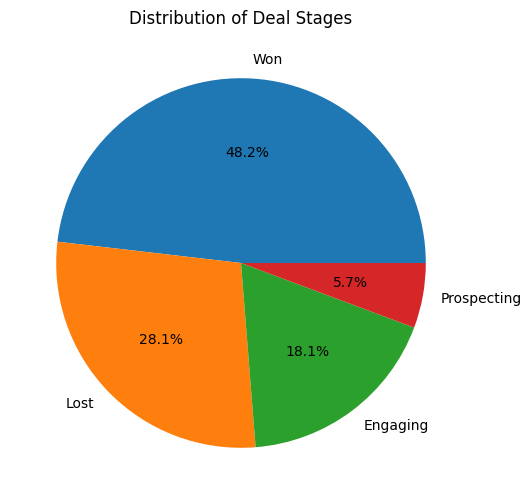

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


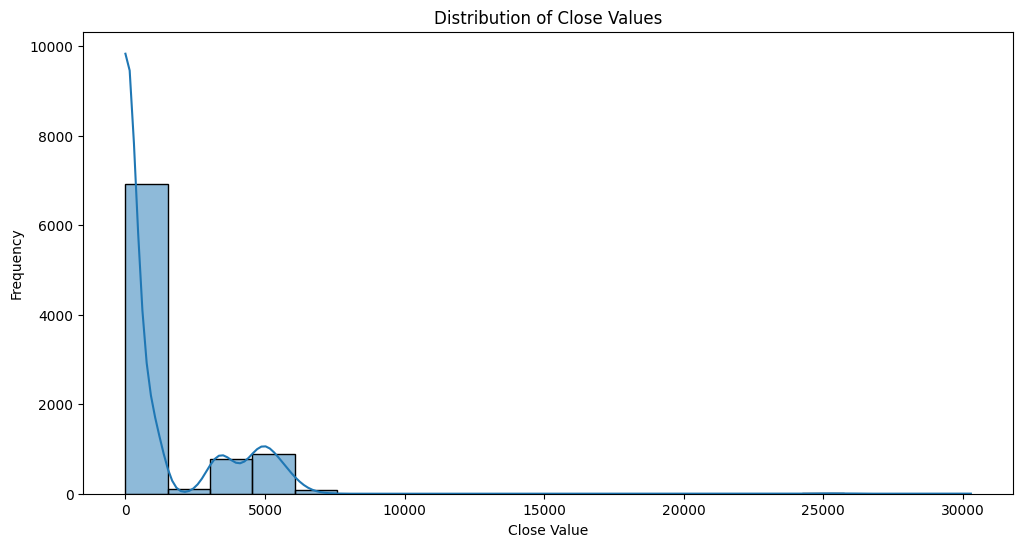

In [10]:
# Visualizing Sales Pipeline Dataset
plt.figure(figsize=(10, 6))
sp['deal_stage'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Deal Stages')
plt.ylabel('')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(x='close_value', data=sp, bins=20, kde=True)
plt.title('Distribution of Close Values')
plt.xlabel('Close Value')
plt.ylabel('Frequency')
plt.show()

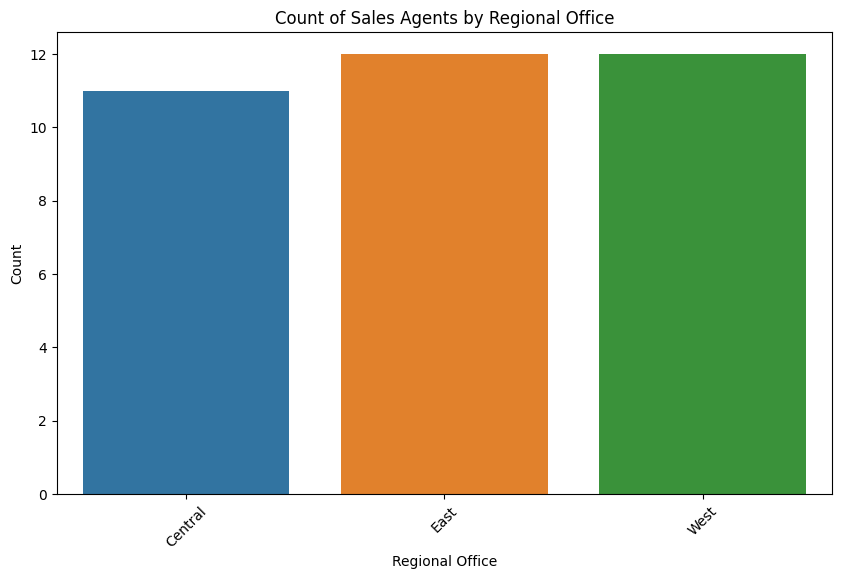

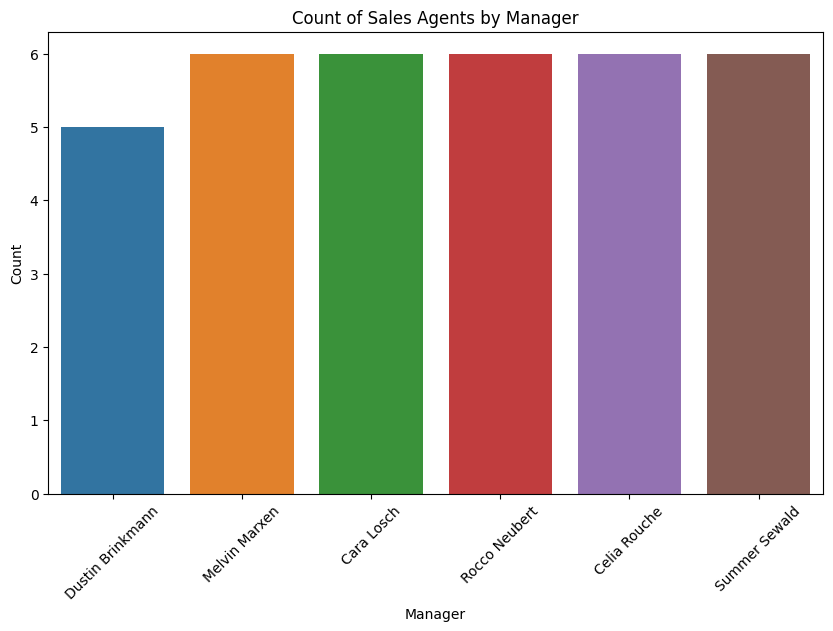

In [11]:
# Visualizing Sales Teams Dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='regional_office', data=st)
plt.title('Count of Sales Agents by Regional Office')
plt.xlabel('Regional Office')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='manager', data=st)
plt.title('Count of Sales Agents by Manager')
plt.xlabel('Manager')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()